In [1]:
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('books_final.csv')

In [3]:
df.corr()

,Unnamed: 0,Genre,Author,Pages,Publish_Date,language,Num_Reviews,Num_Ratings,Rating
Unnamed: 0,1.000000,0.992896,0.926622,0.174962,-0.040378,0.007188,-0.127802,-0.144871,-0.066933
Genre,0.992896,1.000000,0.928715,0.180798,-0.049181,0.004485,-0.106653,-0.114482,-0.061960
Author,0.926622,0.928715,1.000000,0.171373,-0.063852,0.008789,-0.076132,-0.052349,-0.083353
Pages,0.174962,0.180798,0.171373,1.000000,-0.031953,0.004954,0.030219,0.064109,0.111006
Publish_Date,-0.040378,-0.049181,-0.063852,-0.031953,1.000000,0.008917,0.343978,0.011646,-0.077207
language,0.007188,0.004485,0.008789,0.004954,0.008917,1.000000,-0.019710,-0.011534,-0.022314
Num_Reviews,-0.127802,-0.106653,-0.076132,0.030219,0.343978,-0.019710,1.000000,0.739409,-0.045525
Num_Ratings,-0.144871,-0.114482,-0.052349,0.064109,0.011646,-0.011534,0.739409,1.000000,0.063944
Rating,-0.066933,-0.061960,-0.083353,0.111006,-0.077207,-0.022314,-0.045525,0.063944,1.000000


In [4]:
df['Num_Ratings/Rating'] = df['Num_Ratings'] / df['Rating']
df['Num_Reviews/Rating'] = df['Num_Reviews'] / df['Rating']
df['Num_Ratings/Num_Reviews'] = df['Num_Ratings'] / df['Num_Reviews']
df['Author*Genre'] = df['Author'] * df['Genre']

In [5]:
df_numeric = df.drop(columns=['Title', 'Unnamed: 0', 'language'])

In [6]:
# We want to predict the 'Rating' variable
X = df_numeric.drop(['Rating'], axis=1)
y = df_numeric['Rating']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

reg = LinearRegression() 
reg.fit(xtrain, ytrain)
acc = reg.score(xtest, ytest)

print(acc)

0.5104579844629615


In [7]:
#As it turns out our model only managed to get the above score because of low correlation values

In [8]:
df_numeric

,Genre,Author,Pages,Publish_Date,Num_Reviews,Num_Ratings,Rating,Num_Ratings/Rating,Num_Reviews/Rating,Num_Ratings/Num_Reviews,Author*Genre
0,1,1047,237.0,2002.0,3289.0,102075.0,3.92,26039.540816,839.030612,31.035269,1047
1,1,7,122.0,2001.0,1171.0,79099.0,3.75,21093.066667,312.266667,67.548249,7
2,1,1044,528.0,1997.0,454.0,83806.0,4.07,20591.154791,111.547912,184.594714,1044
3,1,340,320.0,2009.0,732.0,60606.0,3.61,16788.365651,202.770083,82.795082,340
4,1,6663,432.0,2004.0,303.0,55948.0,3.82,14646.073298,79.319372,184.646865,6663
...,...,...,...,...,...,...,...,...,...,...,...
6352,8,7756,384.0,2005.0,183.0,2378.0,3.64,653.296703,50.274725,12.994536,62048
6353,8,7757,464.0,2003.0,128.0,3337.0,4.12,809.951456,31.067961,26.070312,62056
6354,8,7758,340.0,2017.0,1018.0,12792.0,4.23,3024.113475,240.661939,12.565815,62064
6355,8,7760,343.0,2013.0,426.0,2703.0,3.86,700.259067,110.362694,6.345070,62080


In [9]:
y_pred = reg.predict(xtest)

print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('R^2:', metrics.r2_score(ytest, y_pred))

MSE: 0.023197997065209613
R^2: 0.5104579844629615


In [10]:
d = dict(zip(list(X.columns), list(sorted(abs(reg.coef_), reverse=True))))

for i in d:
    print(i, ':', d[i])

Genre : 0.04956419634847921
Author : 0.0021539824410486126
Pages : 0.0009663770275983529
Publish_Date : 0.0005398599832274924
Num_Reviews : 0.0003762100262414743
Num_Ratings : 0.00013675725816473679
Num_Ratings/Rating : 5.533086649495565e-05
Num_Reviews/Rating : 3.402109121170086e-05
Num_Ratings/Num_Reviews : 2.8789001613022756e-05
Author*Genre : 8.504957609340862e-06


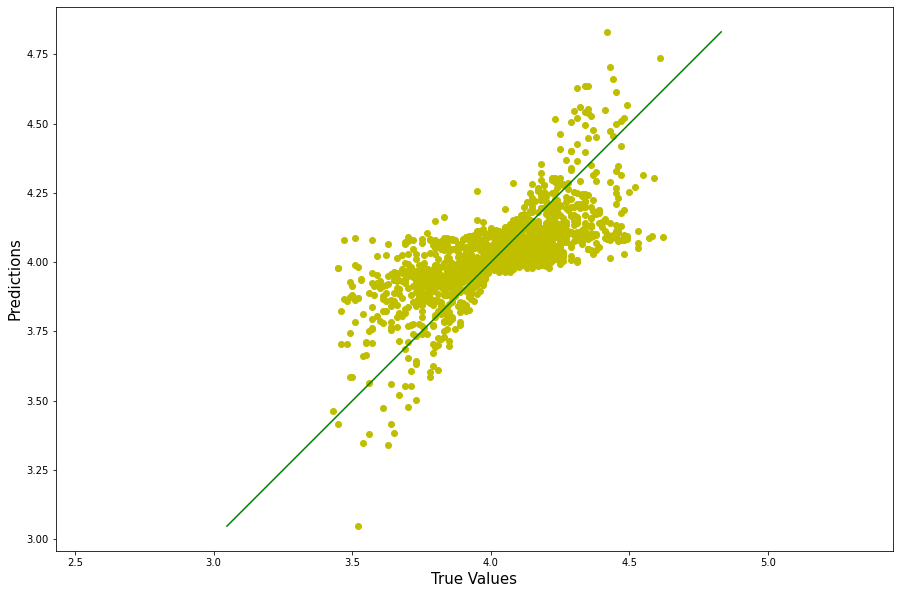

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, y_pred, c='y')
p1 = max(max(y_pred), max(ytest))
p2 = min(min(y_pred), min(ytest))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()